Start

In [1]:
# imports
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

from sklearn.preprocessing import LabelEncoder

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None

In [2]:
RAW_PATH = config['Paths']['raw_data']
df_raw = pd.read_csv(f'{RAW_PATH}heart.csv', delimiter=",")
print(df_raw.info())

df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df = df_raw.copy()

In [4]:
del df_raw

target_variable=HeartDisease

In [5]:
# transpose describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
# columns
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
# check for nulls
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

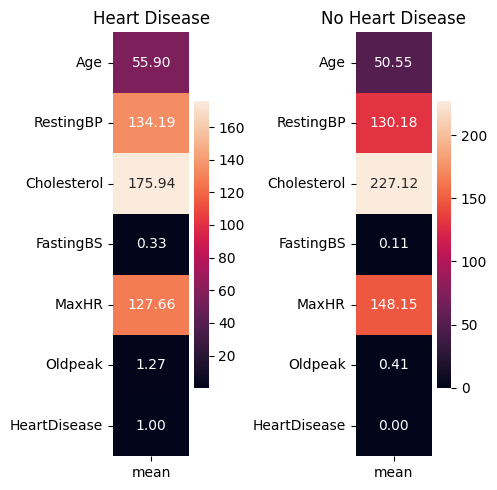

In [9]:
# mean values of all the features with respect to target variable

yes = df[df.HeartDisease == 1].describe().T
no = df[df.HeartDisease == 0].describe().T

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5,5))

plt.subplot(1,2,1)
sns.heatmap(yes[['mean']], annot = True, fmt= '.2f')
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean']], annot = True, fmt = '.2f',)
plt.title('No Heart Disease')

fig.tight_layout()

In [10]:
# list of numerical & categorical features

col = list(df.columns)

numerical_feats = []
categorical_feats = []

for i in col:
    if pd.api.types.is_numeric_dtype(df[i]):
        numerical_feats.append(i)
    elif pd.api.types.is_categorical_dtype(df[i]) or pd.api.types.is_object_dtype(df[i]):
        categorical_feats.append(i)

print(f'Numerical Features: {numerical_feats}')
print(f'Categorical Features: {categorical_feats}')

Numerical Features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical Features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [11]:
# encode categorical features using label encoder

label_encoder = LabelEncoder()
df_01 = df.copy()

for i in categorical_feats:
    df_01[i] = label_encoder.fit_transform(df_01[i])

df_01.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
del df

In [13]:
# export as csv
PROCESSED_PATH = config['Paths']['processed_data']
df_01.to_csv(f"{PROCESSED_PATH}heart_encoded.csv", index=False)

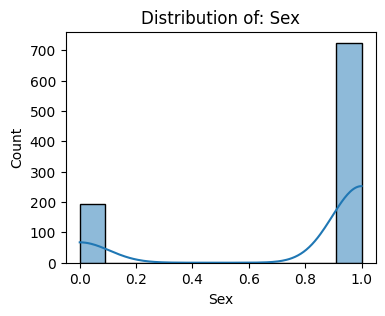

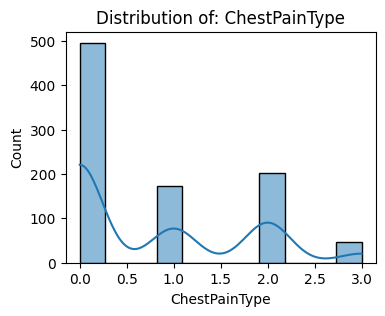

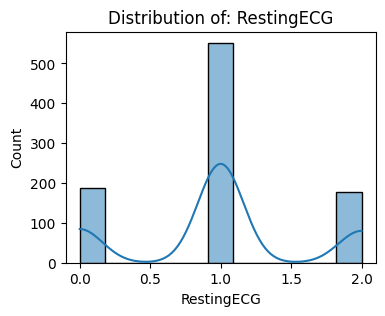

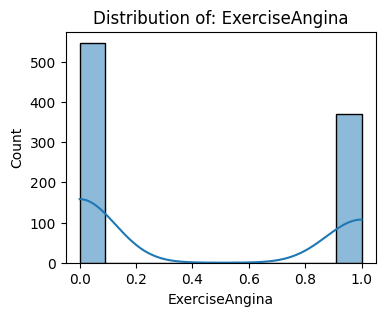

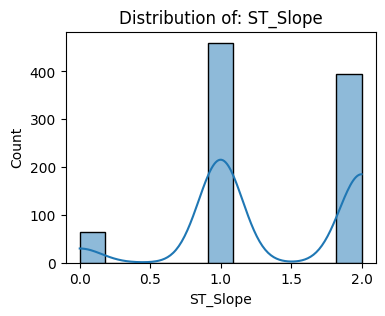

In [14]:
# check distribution of all categorical features
for i in categorical_feats:
    plt.figure(figsize = (4, 3))
    sns.histplot(df_01[i], kde=True)
    plt.title(f'Distribution of: {i}')
    plt.show()

categorical features have a relatively near normal distribution

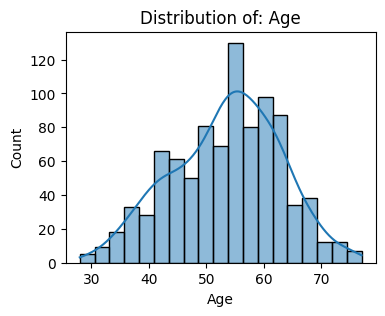

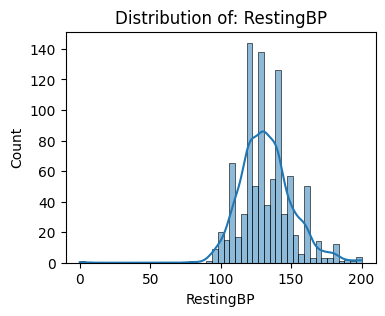

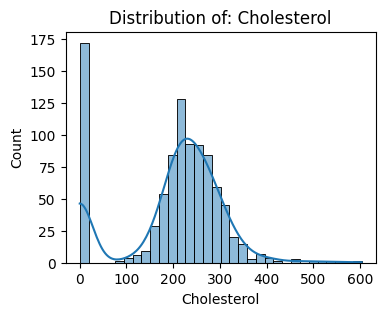

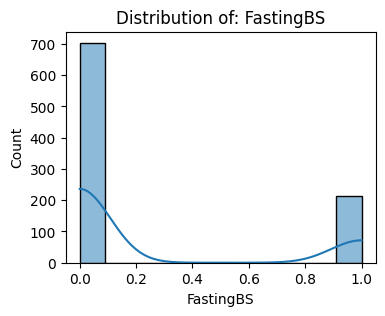

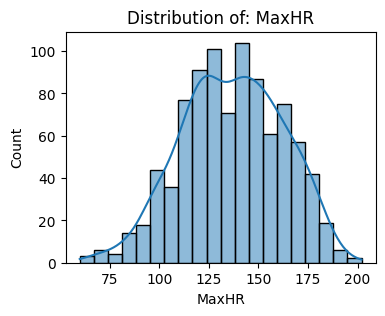

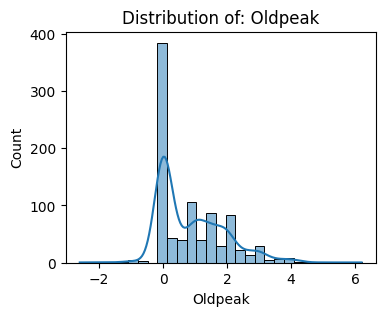

In [15]:
# similarily for numerical features
numerical_feats.remove('HeartDisease')

for i in numerical_feats:
    plt.figure(figsize = (4, 3))
    sns.histplot(df_01[i], kde=True)
    plt.title(f'Distribution of: {i}')
    plt.show()

numerical feature also the same with relatively near normal distribution - except for:

1. 'Cholesterol': seeme to have an outlier which high count of 0 (which does not make sense)
2. 'Oldpeak': seems to be rightly skewed

In [16]:
# check further for Cholesterol.. 
df_01['Cholesterol'].value_counts(normalize=True).sort_index()

Cholesterol
0      0.187364
85     0.001089
100    0.002179
110    0.001089
113    0.001089
117    0.001089
123    0.001089
126    0.002179
129    0.001089
131    0.001089
132    0.001089
139    0.002179
141    0.001089
142    0.001089
147    0.002179
149    0.002179
152    0.001089
153    0.001089
156    0.001089
157    0.001089
159    0.001089
160    0.006536
161    0.002179
163    0.002179
164    0.002179
165    0.001089
166    0.004357
167    0.003268
168    0.002179
169    0.002179
170    0.002179
171    0.003268
172    0.002179
173    0.002179
174    0.001089
175    0.004357
176    0.001089
177    0.006536
178    0.001089
179    0.002179
180    0.003268
181    0.002179
182    0.005447
183    0.001089
184    0.004357
185    0.003268
186    0.006536
187    0.002179
188    0.004357
190    0.002179
192    0.004357
193    0.006536
194    0.002179
195    0.007625
196    0.006536
197    0.007625
198    0.006536
199    0.003268
200    0.004357
201    0.006536
202    0.003268
203    0.007

In [17]:
# create new Cholesterol column 'Cholesterol_imp' where all 0 are replaced with median value
df_01['Cholesterol_imp'] = df_01['Cholesterol'].replace(0, df_01['Cholesterol'].median())
df_01.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_imp
0,40,1,1,140,289,0,1,172,0,0.0,2,0,289
1,49,0,2,160,180,0,1,156,0,1.0,1,1,180
2,37,1,1,130,283,0,2,98,0,0.0,2,0,283
3,48,0,0,138,214,0,1,108,1,1.5,1,1,214
4,54,1,2,150,195,0,1,122,0,0.0,2,0,195


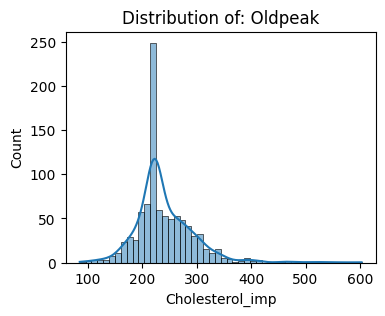

In [18]:
plt.figure(figsize = (4, 3))
sns.histplot(df_01['Cholesterol_imp'], kde=True)
plt.title(f'Distribution of: {i}')
plt.show()

In [19]:
# check dist of target variable
df_01['HeartDisease'].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

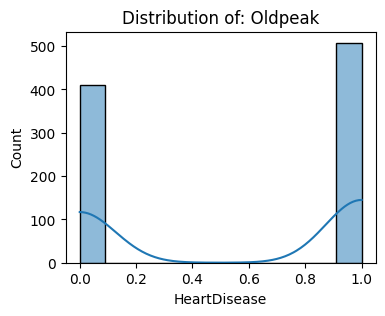

In [20]:
plt.figure(figsize = (4, 3))
sns.histplot(df_01['HeartDisease'], kde=True)
plt.title(f'Distribution of: {i}')
plt.show()

In [21]:
# check class balance ratio 
class_counts = df_01['HeartDisease'].value_counts()
balance_ratio = class_counts[1] / class_counts[0]

print(f'Class balance ratio: {round(balance_ratio, 3)}')

Class balance ratio: 1.239


There is slight imbalance towards minority class (ratio > 1.0) but the values is small enough for us to considered this as a relatively balanced dataset.

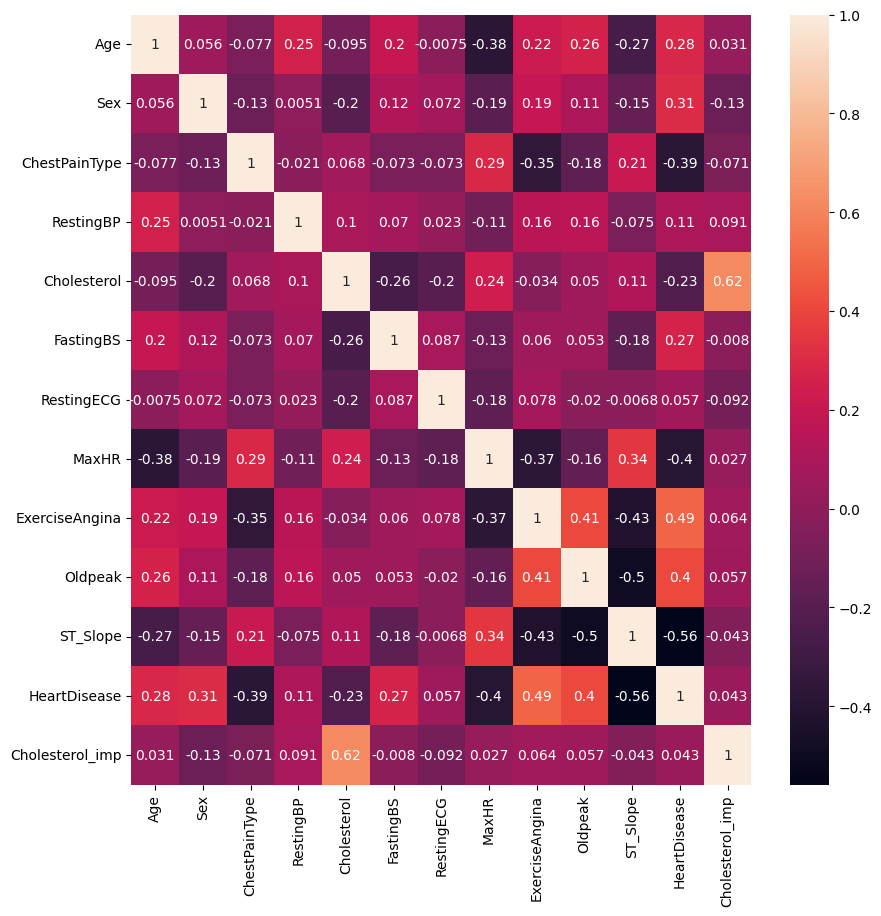

In [22]:
# plot corr for all the features
corr_df = df_01.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True)
plt.show()

cor_target = abs(corr_df["HeartDisease"])

In [23]:
df_01.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_imp
0,40,1,1,140,289,0,1,172,0,0.0,2,0,289
1,49,0,2,160,180,0,1,156,0,1.0,1,1,180
2,37,1,1,130,283,0,2,98,0,0.0,2,0,283
3,48,0,0,138,214,0,1,108,1,1.5,1,1,214
4,54,1,2,150,195,0,1,122,0,0.0,2,0,195


In [24]:
# export as csv
PROCESSED_PATH = config['Paths']['processed_data']
df_01.to_csv(f"{PROCESSED_PATH}heart_encoded_2.csv", index=False)

End